In [60]:
# Частина третя: Аналіз датасет c Kaggle.com.

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [62]:
# Прочитайте csv файл (використовуйте функцію read_csv).
df = pd.read_csv("bestsellers with categories.csv")

In [63]:
# Виведіть перші п'ять рядків (використовується функція head).
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [64]:
# Виведіть розміри датасету (використовуйте атрибут shape).
df.shape

(550, 7)

In [65]:
# Про скільки книг зберігає дані датасет? 

# Відповідь : 550.

In [66]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [67]:
# Первинне дослідження даних.

In [68]:
# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців
# (використовуйте функції isna та sum).
print(df.isna().sum())

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [69]:
# Чи є в якихось змінних пропуски? (Так / ні).

# Відповідь : Ні.

In [70]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique).
print(df['genre'].unique())

['Non Fiction' 'Fiction']


In [71]:
# Які є унікальні жанри?

# Відповідь : 'Non Fiction' and 'Fiction'.

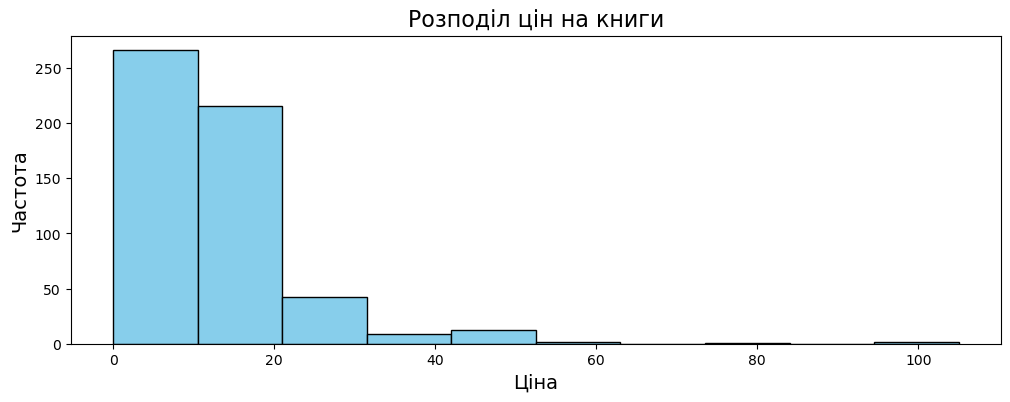

In [72]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist').

df["price"].plot(figsize=(12,4), color='skyblue', edgecolor='black', kind="hist")
plt.title('Розподіл цін на книги', fontsize=16)
plt.xlabel('Ціна', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.show()

In [73]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна 
# (використовуйте функції max, min, mean, median).
df['price'].agg(['max', 'min', 'mean', 'median'])

max       105.0
min         0.0
mean       13.1
median     11.0
Name: price, dtype: float64

In [74]:
# Максимальна ціна?

# Відповідь : 105.

In [75]:
# Мінімальна ціна?

# Відповідь : 0.0.

In [76]:
# Середня ціна?

# Відповідь : 13.1.

In [77]:
# Медіанна ціна?

# Відповідь : 11.0.

In [78]:
# Пошук та сортування даних.

In [79]:
# Який рейтинг у датасеті найвищий?
df['user_rating'].max()

# Відповідь : 4.9.

4.9

In [80]:
# Скільки книг мають такий рейтинг?
df.query('user_rating == 4.9')['user_rating'].count()

# Відповідь : 52.

52

In [81]:
# Яка книга має найбільше відгуків?
df.sort_values(by ='reviews', ascending=False).iloc[0]['name']

# Відповідь : Where the Crawdads Sing.

'Where the Crawdads Sing'

In [82]:
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?
top_50_2015_books = df[df['year'] == 2015]
most_expensive_book_2015 = top_50_2015_books[top_50_2015_books['price'] == top_50_2015_books['price'].max()]['name'].values[0]
print(most_expensive_book_2015)

# Відповідь : Publication Manual of the American Psychological Association, 6th Edition.

Publication Manual of the American Psychological Association, 6th Edition


In [83]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?
df.query("year == 2010 & genre == 'Fiction'")['genre'].count()

# Відповідь : 20.

20

In [84]:
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
df.query('user_rating == 4.9 & (year == 2010 | year == 2011)')['name'].count()

# Відповідь : 1.

1

In [85]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу
# в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

sorted_books = df.query('year == 2015 & price < 8').sort_values('price')
print(sorted_books)

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

In [86]:
# Яка книга остання у відсортованому списку?
print(sorted_books.tail(1)['name'].values[0])

# Відповідь : Old School (Diary of a Wimpy Kid #10).

Old School (Diary of a Wimpy Kid #10)


In [87]:
# Агрегування даних та з'єднання таблиць.

In [88]:
# Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів 
# (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень 
# використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам.
print(df[["genre","price"]].groupby("genre").agg(['min', 'max']))

            price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105


In [89]:
# Максимальна ціна для жанру Fiction?

# Відповідь : 82.

In [90]:
# Мінімальна ціна для жанру Fiction?

# Відповідь : 0.

In [91]:
# Максимальна ціна для жанру Non Fiction?

# Відповідь : 105.

In [92]:
# Мінімальна ціна для жанру Non Fiction?

# Відповідь : 0.

In [93]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів 
# (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).
# Не беріть усі стовпці, виберете тільки потрібні.
counted_book = df.groupby(['author'])['name'].agg(['count'])
print(counted_book)

                            count
author                           
Abraham Verghese                2
Adam Gasiewski                  1
Adam Mansbach                   1
Adir Levy                       1
Admiral William H. McRaven      1
...                           ...
Walter Isaacson                 3
William Davis                   2
William P. Young                2
Wizards RPG Team                3
Zhi Gang Sha                    2

[248 rows x 1 columns]


In [94]:
# Якої розмірності вийшла таблиця?

# Відповідь : [248 rows x 1 columns].

In [95]:
# Який автор має найбільше книг?
max_count = counted_book['count'].max()
print(counted_book.query('count == @max_count'))

# Відповідь : Jeff Kinney.

             count
author            
Jeff Kinney     12


In [96]:
# Скільки книг цього автора?

# Відповідь : 12.

In [97]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора 
# (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean).
# Не беріть усі стовпці, виберете тільки потрібні.
average_rate = df.groupby(['author'])['user_rating'].agg(['mean'])
print(average_rate)

                                mean
author                              
Abraham Verghese            4.600000
Adam Gasiewski              4.400000
Adam Mansbach               4.800000
Adir Levy                   4.800000
Admiral William H. McRaven  4.700000
...                              ...
Walter Isaacson             4.566667
William Davis               4.400000
William P. Young            4.600000
Wizards RPG Team            4.800000
Zhi Gang Sha                4.600000

[248 rows x 1 columns]


In [98]:
# У якого автора середній рейтинг мінімальний?
min_rate = average_rate['mean'].min()
print(average_rate.query('mean == @min_rate'))

# Відповідь : Donna Tartt.

             mean
author           
Donna Tartt   3.9


In [99]:
# Який у цього автора середній рейтинг?

# Відповідь : 3.9.

In [100]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та 
# середній рейтинг (Використовуйте функцію concat з параметром axis=1). 
# Збережіть результат у змінну.
df_a = pd.concat([counted_book, average_rate], axis=1)
print(df_a)

                            count      mean
author                                     
Abraham Verghese                2  4.600000
Adam Gasiewski                  1  4.400000
Adam Mansbach                   1  4.800000
Adir Levy                       1  4.800000
Admiral William H. McRaven      1  4.700000
...                           ...       ...
Walter Isaacson                 3  4.566667
William Davis                   2  4.400000
William P. Young                2  4.600000
Wizards RPG Team                3  4.800000
Zhi Gang Sha                    2  4.600000

[248 rows x 2 columns]


In [101]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом
# (використовуйте функцію sort_values).
df_a = df_a.sort_values(['count', 'mean'])
print(df_a)

                                    count      mean
author                                             
Muriel Barbery                          1  4.000000
Chris Cleave                            1  4.100000
Ian K. Smith M.D.                       1  4.100000
Pierre Dukan                            1  4.100000
Elizabeth Strout                        1  4.200000
...                                   ...       ...
American Psychological Association     10  4.500000
Suzanne Collins                        11  4.663636
Gary Chapman                           11  4.736364
Rick Riordan                           11  4.772727
Jeff Kinney                            12  4.800000

[248 rows x 2 columns]


In [102]:
# Який автор перший у списку?

# Відповідь : Muriel Barbery.

In [103]:
# Додайте від 3 до 5 графіків функцій різного типу на ваш вибір. 
# Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші.
# Можна використовувати як matplotlib, так і seaborn.

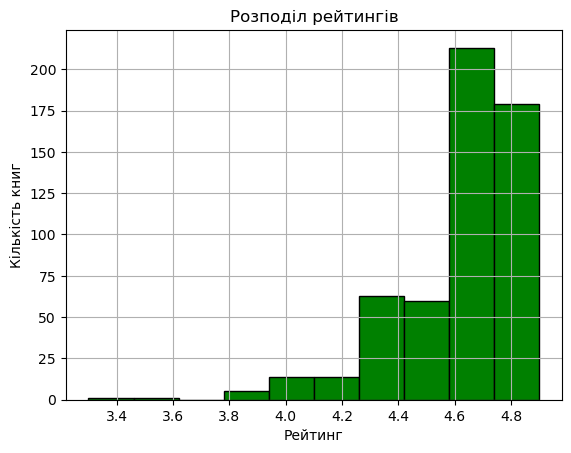

In [106]:
df['user_rating'].hist(color='green', edgecolor='black')
plt.title('Розподіл рейтингів')
plt.xlabel('Рейтинг')
plt.ylabel('Кількість книг')
plt.show()

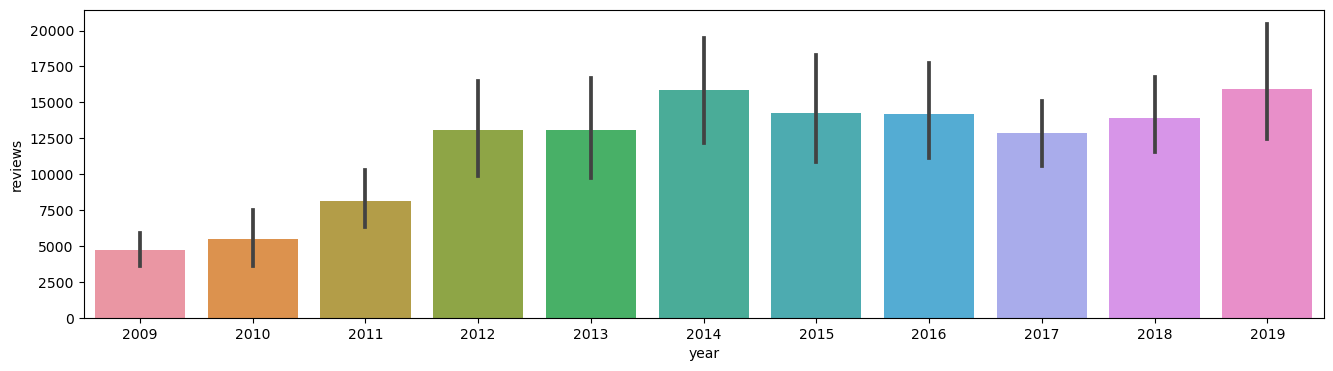

In [107]:
plt.figure(figsize=(16,4))
sns.barplot(data=df, x="year", y="reviews")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


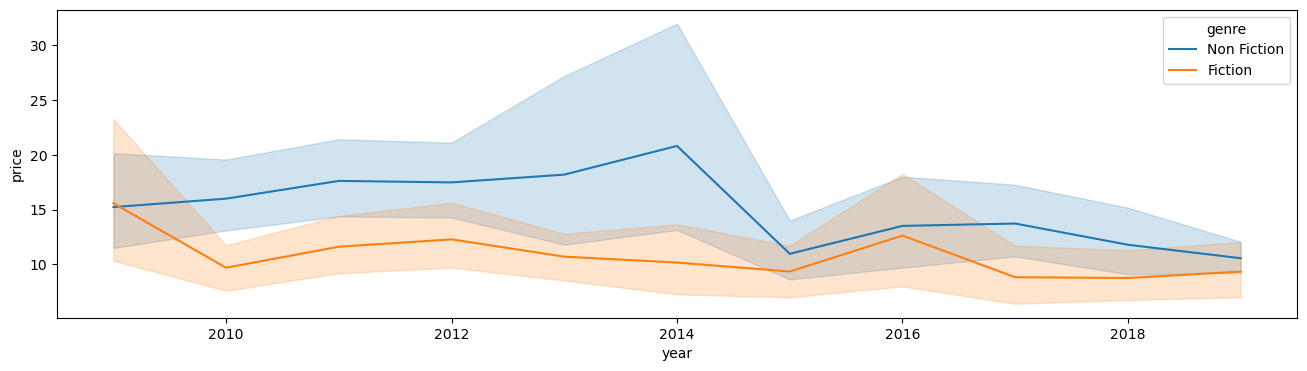

In [108]:
plt.figure(figsize=(16,4))
sns.lineplot(data=df, x="year", y="price", hue="genre")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1600x400 with 0 Axes>

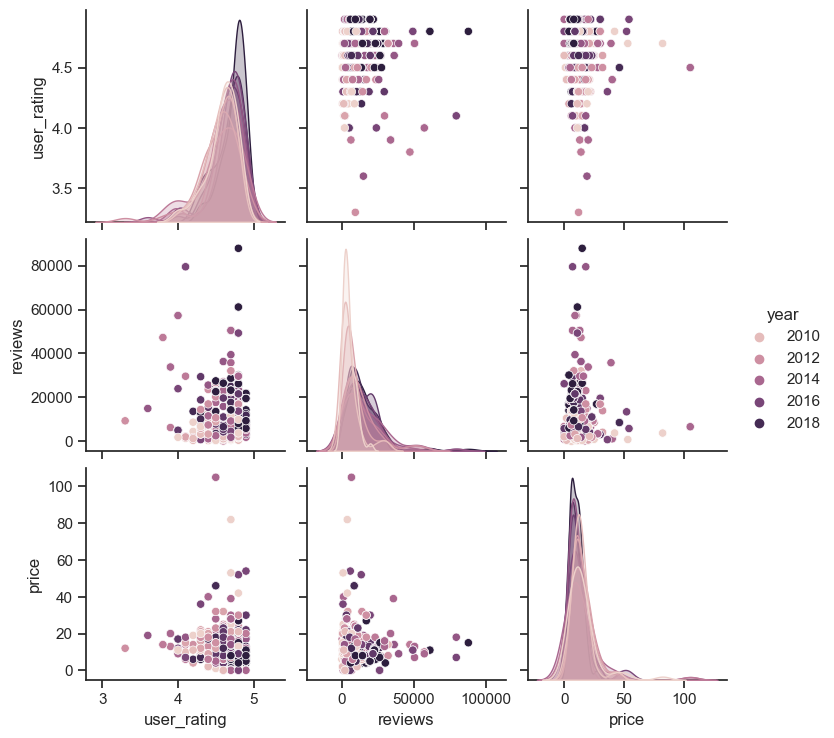

In [115]:
plt.figure(figsize=(16,4))
sns.pairplot(df, hue="year")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1600x1000 with 0 Axes>

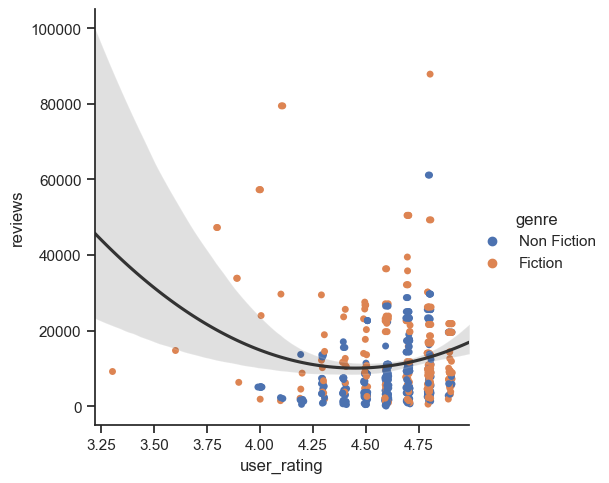

In [122]:
plt.figure(figsize=(16,10))
sns.catplot(
    data=df, x="user_rating", y="reviews", hue="genre",
    native_scale=True, zorder=1
)
sns.regplot(
    data=df, x="user_rating", y="reviews",
    scatter=False, truncate=False, order=2, color=".2",
)
plt.show()